In [1]:
#%load_ext lab_black

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipyparallel as ipp

import pymannkendall as mk


import gc
import timeit
import sys
import os

from random import normalvariate
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from scipy.stats import shapiro
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

## Test propensity of normal and uniform distributions to generate trends

### Fixed mean or base value

https://www.geeksforgeeks.org/how-to-perform-a-mann-kendall-trend-test-in-python/

https://www.statisticshowto.com/mann-kendall-trend-test/ : The test can be used to find trends for as few as four samples. However, with only a few data points, the test has a high probability of not finding a trend when one would be present if more points were provided. The more data points you have the more likely the test is going to find a true trend (as opposed to one found by chance). The minimum number of recommended measurements is therefore at least 8 to 10.

The Mann-Kendall Trend Test analyzes difference in signs between earlier and later data points. The idea is that if a trend is present, the sign values will tend to increase constantly, or decrease constantly. Every value is compared to every value preceding it in the time series, which gives a total of n(n – 1) / 2 pairs of data, where “n” is the number of observations in the set. For example, if you have 20 observations, the number of pairwise comparisons is:
20(20 – 1) / 2 = 20(19)/2 = 380/2 = 190.

In [2]:
# Normal distribution 
c_v = [0.218, 0.110, 0.308, 0.151, 0.164, 0.179]
mu = 2000
sigma = mu*c_v[2]
synt_obs = np.random.normal(mu, sigma, (10000,15))

M_K = []
for i in range(len(synt_obs)):
    # perform Mann-Kendall Trend Test
    test_stat = mk.original_test(synt_obs[i,:])
    M_K.append(test_stat[0])
    
prob_no_trend = {item: M_K.count(item) for item in M_K}
print("Probability for no trend using Mann_Kendall_Test on normal distribution:", prob_no_trend.get('no trend')/len(synt_obs))

Probability for no trend using Mann_Kendall_Test on normal distribution: 0.9561


In [3]:
# Uniform distribution 
c_v = [0.218, 0.110, 0.308, 0.151, 0.164, 0.179]
mu = 2000
synt_obs = np.random.uniform(mu*0.5, mu*1.5, (10000,15))
M_K = []
for i in range(len(synt_obs)):
    # perform Mann-Kendall Trend Test
    test_stat = mk.original_test(synt_obs[i,:])
    M_K.append(test_stat[0])
    
prob_no_trend = {item: M_K.count(item) for item in M_K}
print("Probability for no trend using Mann_Kendall_Test on uniform distribution:", prob_no_trend.get('no trend')/len(synt_obs))

Probability for no trend using Mann_Kendall_Test on uniform distribution: 0.9528


## Do M-K test on seen_deer data

In [4]:
# Revoking stored reported data
# https://ipython.org/ipython-doc/rel-0.12/config/extensions/storemagic.html

%store -r data_Averoy
%store -r data_Tingvoll
%store -r data_Surnadal
%store -r data_Sunndal
%store -r data_Vestnes
%store -r data_Laerdal

In [30]:
municipalities = ["Averoy", "Tingvoll", "Surnadal", "Sunndal", "Vestnes", "Laerdal"]
data_municipality = [
    data_Averoy,
    data_Tingvoll,
    data_Surnadal,
    data_Sunndal,
    data_Vestnes,
    data_Laerdal,
]
for q in range(len(municipalities)):
    [
        municipality,
        first_year,
        last_year,
        number_of_years,
        years,
        seen_deer_obs,
        seen_deer_obs_forest,
        seen_deer_obs_farmland,
        hinds_per_stag_obs,
        total_harvest,
        total_quota,
        fraction_female_calves_harvested,
        fraction_young_hinds_harvested,
        fraction_adult_hinds_harvested,
        fraction_male_calves_harvested,
        fraction_young_stags_harvested,
        fraction_adult_stags_harvested,
        spring_counts,
    ] = data_municipality[q]
    
    if q == 2:
            seen_deer_obs = seen_deer_obs_farmland
    else:
        seen_deer_obs = seen_deer_obs
        
    test_stat = mk.original_test(seen_deer_obs)
    #print(municipalities[q],":", test_stat[0])
    print(test_stat)


Mann_Kendall_Test(trend='no trend', h=False, p=0.09123902905538861, z=-1.688897736871851, Tau=-0.3088235294117647, s=-42.0, var_s=589.3333333333334, slope=-0.029999999999999957, intercept=1.4299999999999997)
Mann_Kendall_Test(trend='no trend', h=False, p=0.1244546763464569, z=-1.5363413772941894, Tau=-0.27941176470588236, s=-38.0, var_s=580.0, slope=-0.003923076923076915, intercept=0.5713846153846154)
Mann_Kendall_Test(trend='no trend', h=False, p=0.5366482363005154, z=-0.6178894159287259, Tau=-0.11764705882352941, s=-16.0, var_s=589.3333333333334, slope=-0.008500000000000008, intercept=0.9780000000000001)
Mann_Kendall_Test(trend='no trend', h=False, p=0.5324451122785512, z=-0.6242778738200958, Tau=-0.11764705882352941, s=-16.0, var_s=577.3333333333334, slope=-0.0021825396825396813, intercept=0.40746031746031747)
Mann_Kendall_Test(trend='no trend', h=False, p=0.4338268403653007, z=-0.7826599268430529, Tau=-0.14705882352941177, s=-20.0, var_s=589.3333333333334, slope=-0.0033484848484848

## Do M-K test on spring_count data

In [16]:
municipalities = ["Tingvoll", "Surnadal", "Sunndal", "Vestnes", "Laerdal"]
data_municipality = [
    data_Tingvoll,
    data_Surnadal,
    data_Sunndal,
    data_Vestnes,
    data_Laerdal,
]
for q in range(len(municipalities)):
    [
        municipality,
        first_year,
        last_year,
        number_of_years,
        years,
        seen_deer_obs,
        seen_deer_obs_forest,
        seen_deer_obs_farmland,
        hinds_per_stag_obs,
        total_harvest,
        total_quota,
        fraction_female_calves_harvested,
        fraction_young_hinds_harvested,
        fraction_adult_hinds_harvested,
        fraction_male_calves_harvested,
        fraction_young_stags_harvested,
        fraction_adult_stags_harvested,
        spring_counts,
    ] = data_municipality[q]
        
    test_stat = mk.original_test(spring_counts)
    print(municipalities[q],":", test_stat[0])

Tingvoll : increasing
Surnadal : no trend
Sunndal : increasing
Vestnes : no trend
Laerdal : no trend


## Do M-K test on hinds_per_stag data and find mean values

In [6]:
municipalities = ["Averoy", "Tingvoll", "Surnadal", "Sunndal", "Vestnes", "Laerdal"]
data_municipality = [
    data_Averoy,
    data_Tingvoll,
    data_Surnadal,
    data_Sunndal,
    data_Vestnes,
    data_Laerdal,
]
for q in range(len(municipalities)):
    [
        municipality,
        first_year,
        last_year,
        number_of_years,
        years,
        seen_deer_obs,
        seen_deer_obs_forest,
        seen_deer_obs_farmland,
        hinds_per_stag_obs,
        total_harvest,
        total_quota,
        fraction_female_calves_harvested,
        fraction_young_hinds_harvested,
        fraction_adult_hinds_harvested,
        fraction_male_calves_harvested,
        fraction_young_stags_harvested,
        fraction_adult_stags_harvested,
        spring_counts,
    ] = data_municipality[q]
        
    test_stat = mk.original_test(hinds_per_stag_obs)
    print(municipalities[q],":", test_stat[0])
    print(municipalities[q],":", np.mean(np.array(hinds_per_stag_obs)))
    print()

Averoy : decreasing
Averoy : 2.3658823529411763

Tingvoll : increasing
Tingvoll : 2.166470588235294

Surnadal : decreasing
Surnadal : 1.8605882352941179

Sunndal : decreasing
Sunndal : 1.7176470588235293

Vestnes : no trend
Vestnes : 1.7958823529411763

Laerdal : no trend
Laerdal : 1.7217647058823529



# Find CV and max relative distance from mean values of the seen_deer_per_hour data

In [10]:
municipalities = ["Averoy", "Tingvoll", "Surnadal", "Sunndal", "Vestnes", "Laerdal"]
data_municipality = [
    data_Averoy,
    data_Tingvoll,
    data_Surnadal,
    data_Sunndal,
    data_Vestnes,
    data_Laerdal,
]

cv = []
spread = []
for q in range(len(municipalities)):
    [
        municipality,
        first_year,
        last_year,
        number_of_years,
        years,
        seen_deer_obs,
        seen_deer_obs_forest,
        seen_deer_obs_farmland,
        hinds_per_stag_obs,
        total_harvest,
        total_quota,
        fraction_female_calves_harvested,
        fraction_young_hinds_harvested,
        fraction_adult_hinds_harvested,
        fraction_male_calves_harvested,
        fraction_young_stags_harvested,
        fraction_adult_stags_harvested,
        spring_counts,
    ] = data_municipality[q]
        
    if q == 2:
        seen_deer_obs = seen_deer_obs_farmland
    else:
        seen_deer_obs = seen_deer_obs
    
    seen_deer_obs = np.array(seen_deer_obs)
    cv.append(np.std(seen_deer_obs)/np.mean(seen_deer_obs))
    
    spread.append(np.max(abs(seen_deer_obs)-np.mean(seen_deer_obs))/np.mean(seen_deer_obs))

print("Coefficient of variation:", cv)
print("Mean cv:", np.mean(np.array(cv)))
print()
print("Max relative distance from mean:", spread)
print("Mean max relative distance from mean:", np.mean(np.array(spread)))

Coefficient of variation: [0.24256566174492836, 0.12663386287325576, 0.29450760435855233, 0.14884485954168258, 0.15943202649851343, 0.16771896217427537]
Mean cv: 0.18995049619853463

Max relative distance from mean: [0.40575243965074487, 0.2754759238521835, 0.6062992125984251, 0.19610778443113766, 0.18805798214457145, 0.37413394919168586]
Mean max relative distance from mean: 0.3409712153114581


## Displaying seen_deer patterns for Surnadal

In [11]:
[
        municipality,
        first_year,
        last_year,
        number_of_years,
        years,
        seen_deer_obs,
        seen_deer_obs_forest,
        seen_deer_obs_farmland,
        hinds_per_stag_obs,
        total_harvest,
        total_quota,
        fraction_female_calves_harvested,
        fraction_young_hinds_harvested,
        fraction_adult_hinds_harvested,
        fraction_male_calves_harvested,
        fraction_young_stags_harvested,
        fraction_adult_stags_harvested,
        spring_counts,
    ] = data_municipality[2]

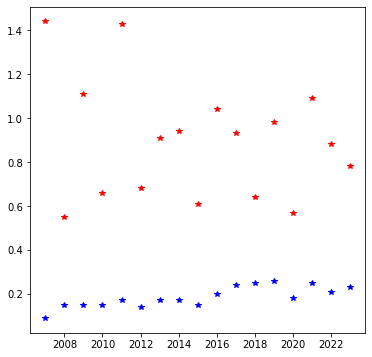

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
time = np.arange(2007,2024,1)
ax.plot(time,seen_deer_obs_farmland,'r*')
ax.plot(time,seen_deer_obs, 'b*')

## Semi_average analyses to assay trends

In [17]:
# Seen-deer 
municipalities = ["Averoy", "Tingvoll", "Surnadal", "Sunndal", "Vestnes", "Laerdal"]
data_municipality = [
    data_Averoy,
    data_Tingvoll,
    data_Surnadal,
    data_Sunndal,
    data_Vestnes,
    data_Laerdal,
]

q = 0
for municipality in municipalities:
    [
        municipality,
        first_year,
        last_year,
        number_of_years,
        years,
        seen_deer_obs,
        seen_deer_obs_forest,
        seen_deer_obs_farmland,
        hinds_per_stag_obs,
        total_harvest,
        total_quota,
        fraction_female_calves_harvested,
        fraction_young_hinds_harvested,
        fraction_adult_hinds_harvested,
        fraction_male_calves_harvested,
        fraction_young_stags_harvested,
        fraction_adult_stags_harvested,
        spring_counts,
    ] = data_municipality[q]

    if q == 2:
        seen_deer_obs = np.array(seen_deer_obs_farmland)
    else:
        seen_deer_obs = np.array(seen_deer_obs)

    ratio_seen_deer = seen_deer_obs[9:17].mean() / seen_deer_obs[0:8].mean()
    print(municipality, ": Ratio seen_deer = ", ratio_seen_deer)
    q = q + 1

Averoy : Ratio seen_deer =  0.8411764705882352
Tingvoll : Ratio seen_deer =  0.9697674418604649
Surnadal : Ratio seen_deer =  0.895077720207254
Sunndal : Ratio seen_deer =  1.006349206349206
Vestnes : Ratio seen_deer =  0.9766140315810514
Laerdal : Ratio seen_deer =  1.0247524752475248


In [19]:
# Spring counts
municipalities = ["Tingvoll", "Surnadal", "Sunndal", "Vestnes", "Laerdal"]
data_municipality = [
    data_Tingvoll,
    data_Surnadal,
    data_Sunndal,
    data_Vestnes,
    data_Laerdal,
]

q = 0
for municipality in municipalities:
    [
        municipality,
        first_year,
        last_year,
        number_of_years,
        years,
        seen_deer_obs,
        seen_deer_obs_forest,
        seen_deer_obs_farmland,
        hinds_per_stag_obs,
        total_harvest,
        total_quota,
        fraction_female_calves_harvested,
        fraction_young_hinds_harvested,
        fraction_adult_hinds_harvested,
        fraction_male_calves_harvested,
        fraction_young_stags_harvested,
        fraction_adult_stags_harvested,
        spring_counts,
    ] = data_municipality[q]

    spring_counts = np.array(spring_counts)
    ratio_spring_counts = spring_counts[9:17].mean() / spring_counts[0:8].mean()
    print(municipality, ": Ratio spring counts = ", ratio_spring_counts)
    q = q + 1

Tingvoll : Ratio spring counts =  1.4546668892970447
Surnadal : Ratio spring counts =  1.1364529380246473
Sunndal : Ratio spring counts =  1.7154374440131384
Vestnes : Ratio spring counts =  1.1574551270659321
Laerdal : Ratio spring counts =  1.232851143257116


## Do Augmented Dickey-Fuller test on seen_deer data

https://machinelearningmastery.com/time-series-data-stationary-python/ : The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

Averoy :
ADF Statistic: -3.932202
p-value: 0.001810
Critical Values:
	1%: -4.138
	5%: -3.155
	10%: -2.714

Tingvoll :
ADF Statistic: 1.107427
p-value: 0.995280
Critical Values:
	1%: -4.332
	5%: -3.233
	10%: -2.749

Surnadal :
ADF Statistic: -1.565632
p-value: 0.500831
Critical Values:
	1%: -4.069
	5%: -3.127
	10%: -2.702

Sunndal :
ADF Statistic: -5.491256
p-value: 0.000002
Critical Values:
	1%: -3.924
	5%: -3.068
	10%: -2.674

Vestnes :
ADF Statistic: -2.347445
p-value: 0.157122
Critical Values:
	1%: -4.223
	5%: -3.189
	10%: -2.730

Laerdal :
ADF Statistic: -2.196532
p-value: 0.207507
Critical Values:
	1%: -4.332
	5%: -3.233
	10%: -2.749



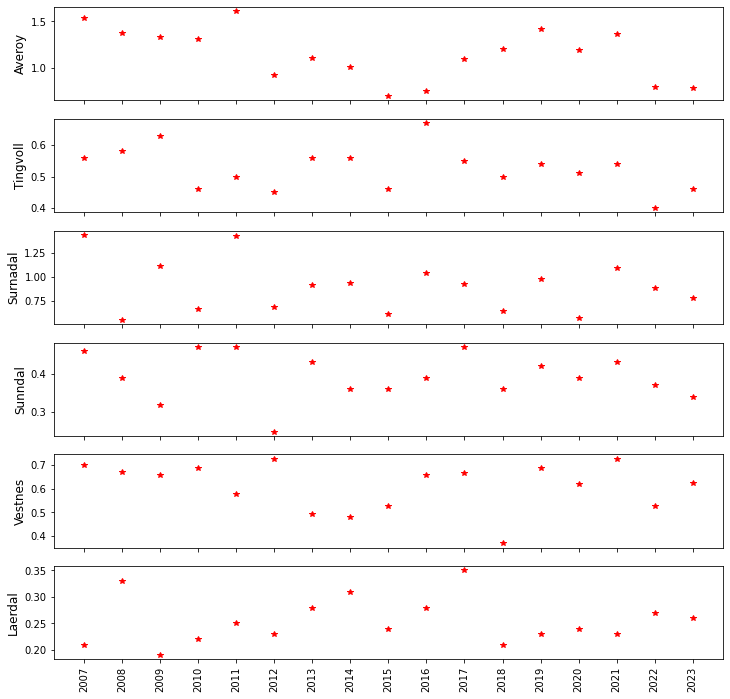

In [23]:
municipalities = ["Averoy", "Tingvoll", "Surnadal", "Sunndal", "Vestnes", "Laerdal"]
data_municipality = [
    data_Averoy,
    data_Tingvoll,
    data_Surnadal,
    data_Sunndal,
    data_Vestnes,
    data_Laerdal,
]

fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(12, 12))
years = np.arange(2007,2024,1)
time_axis = np.arange(number_of_years)

for q in range(len(municipalities)):
    [
        municipality,
        first_year,
        last_year,
        number_of_years,
        years,
        seen_deer_obs,
        seen_deer_obs_forest,
        seen_deer_obs_farmland,
        hinds_per_stag_obs,
        total_harvest,
        total_quota,
        fraction_female_calves_harvested,
        fraction_young_hinds_harvested,
        fraction_adult_hinds_harvested,
        fraction_male_calves_harvested,
        fraction_young_stags_harvested,
        fraction_adult_stags_harvested,
        spring_counts,
    ] = data_municipality[q]
    
    if q == 2:
            seen_deer_obs = seen_deer_obs_farmland
    else:
        seen_deer_obs = seen_deer_obs
        
    result = adfuller(seen_deer_obs)
    print(municipalities[q],":")
    
    ax[q].plot(time_axis,seen_deer_obs, 'r*')
    
    ax[q].set_xticks(time_axis)
    ax[q].set_xticklabels([])
    if q == 5:
        ax[q].set_xticklabels(years, rotation="vertical")
    ax[q].set_ylabel(municipality, fontsize=12)
    
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
     print('\t%s: %.3f' % (key, value))
    print()
pass;

## Do Kwiatkowski-Phillips-Schmidt-Shin test for stationarity on seen_deer data

https://medium.com/@reddyyashu20/kpss-vs-adf-test-with-example-and-python-code-1a6084189995 : KPSS is another test for checking the stationarity of a time series. The null and alternate hypothesis for the KPSS test are opposite that of the ADF test. The null hypothesis is that the process is trend stationary, while the alternate hypothesis is that the series has a unit root (series is not stationary).

https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html : It is always better to apply both the tests, so that it can be ensured that the series is truly stationary. Possible outcomes of applying these stationary tests are as follows:

Case 1: Both tests conclude that the series is not stationary - The series is not stationary

Case 2: Both tests conclude that the series is stationary - The series is stationary

Case 3: KPSS indicates stationarity and ADF indicates non-stationarity - The series is trend stationary. Trend needs to be removed to make series strict stationary. The detrended series is checked for stationarity.

Case 4: KPSS indicates non-stationarity and ADF indicates stationarity - The series is difference stationary. Differencing is to be used to make series stationary. The differenced series is checked for stationarity.

<ipython-input-28-5f502956cb88>:42: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(seen_deer_obs)
<ipython-input-28-5f502956cb88>:54: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(seen_deer_obs, regression="c", nlags="auto")
<ipython-input-28-5f502956cb88>:42: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(seen_deer_obs)
<ipython-input-28-5f502956cb88>:54: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(seen_deer_obs, regression="c", nlags="auto")


Averoy :
Results of KPSS Test:
Test Statistic           0.315272
p-value                  0.100000
Lags Used                1.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64

Tingvoll :
Results of KPSS Test:
Test Statistic           0.235225
p-value                  0.100000
Lags Used                0.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64

Surnadal :
Results of KPSS Test:
Test Statistic           0.376574
p-value                  0.087252
Lags Used                9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64

Sunndal :
Results of KPSS Test:
Test Statistic           0.138453
p-value                  0.100000
Lags Used                4.000000
Critica

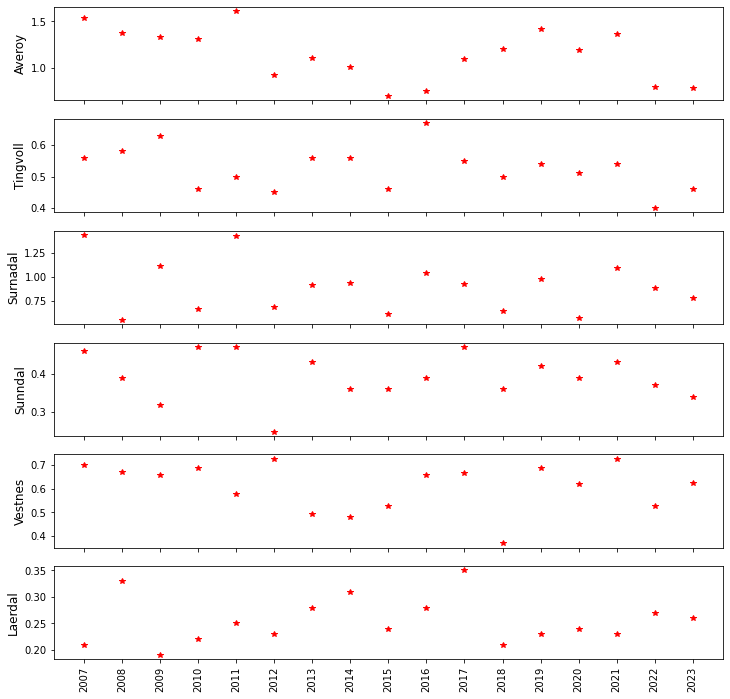

In [28]:
municipalities = ["Averoy", "Tingvoll", "Surnadal", "Sunndal", "Vestnes", "Laerdal"]
data_municipality = [
    data_Averoy,
    data_Tingvoll,
    data_Surnadal,
    data_Sunndal,
    data_Vestnes,
    data_Laerdal,
]

fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(12, 12))
years = np.arange(2007,2024,1)
time_axis = np.arange(number_of_years)

for q in range(len(municipalities)):
    [
        municipality,
        first_year,
        last_year,
        number_of_years,
        years,
        seen_deer_obs,
        seen_deer_obs_forest,
        seen_deer_obs_farmland,
        hinds_per_stag_obs,
        total_harvest,
        total_quota,
        fraction_female_calves_harvested,
        fraction_young_hinds_harvested,
        fraction_adult_hinds_harvested,
        fraction_male_calves_harvested,
        fraction_young_stags_harvested,
        fraction_adult_stags_harvested,
        spring_counts,
    ] = data_municipality[q]
    
    if q == 2:
            seen_deer_obs = seen_deer_obs_farmland
    else:
        seen_deer_obs = seen_deer_obs
        
    result = kpss(seen_deer_obs)
    print(municipalities[q],":")
    
    ax[q].plot(time_axis,seen_deer_obs, 'r*')
    
    ax[q].set_xticks(time_axis)
    ax[q].set_xticklabels([])
    if q == 5:
        ax[q].set_xticklabels(years, rotation="vertical")
    ax[q].set_ylabel(municipality, fontsize=12)
    
    print("Results of KPSS Test:")
    kpsstest = kpss(seen_deer_obs, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)
    print()
pass;

In [29]:
kpsstest

(0.11833107650643189,
 0.1,
 2,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

## Testing the time series for normality

Averoy :
Results of Shapiro-Wilk Test:
ShapiroResult(statistic=0.9518252611160278, pvalue=0.486022025346756)

Tingvoll :
Results of Shapiro-Wilk Test:
ShapiroResult(statistic=0.9692114591598511, pvalue=0.8044752478599548)

Surnadal :
Results of Shapiro-Wilk Test:
ShapiroResult(statistic=0.9210955500602722, pvalue=0.1541106402873993)

Sunndal :
Results of Shapiro-Wilk Test:
ShapiroResult(statistic=0.9362215399742126, pvalue=0.2760675549507141)

Vestnes :
Results of Shapiro-Wilk Test:
ShapiroResult(statistic=0.8982347249984741, pvalue=0.06346328556537628)

Laerdal :
Results of Shapiro-Wilk Test:
ShapiroResult(statistic=0.9389108419418335, pvalue=0.3054972290992737)



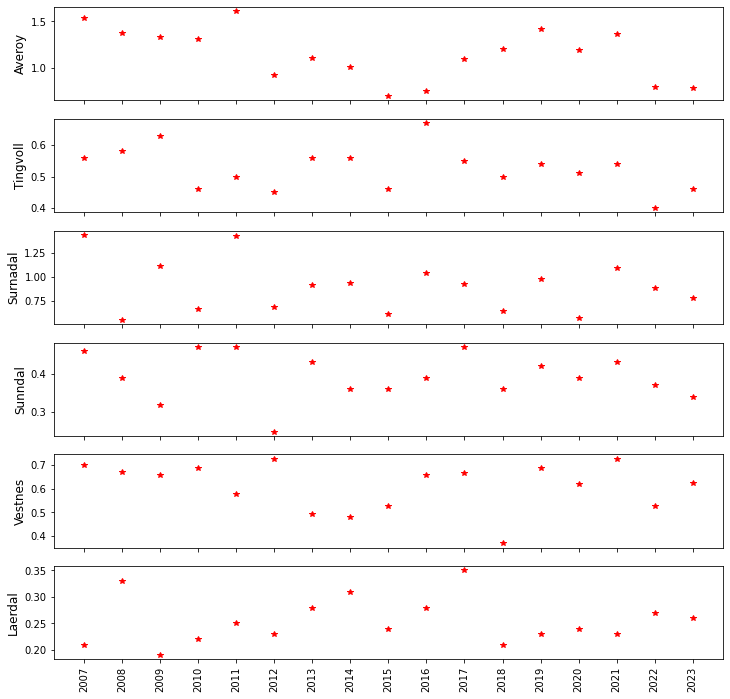

In [33]:
municipalities = ["Averoy", "Tingvoll", "Surnadal", "Sunndal", "Vestnes", "Laerdal"]
data_municipality = [
    data_Averoy,
    data_Tingvoll,
    data_Surnadal,
    data_Sunndal,
    data_Vestnes,
    data_Laerdal,
]

fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(12, 12))
years = np.arange(2007,2024,1)
time_axis = np.arange(number_of_years)

for q in range(len(municipalities)):
    [
        municipality,
        first_year,
        last_year,
        number_of_years,
        years,
        seen_deer_obs,
        seen_deer_obs_forest,
        seen_deer_obs_farmland,
        hinds_per_stag_obs,
        total_harvest,
        total_quota,
        fraction_female_calves_harvested,
        fraction_young_hinds_harvested,
        fraction_adult_hinds_harvested,
        fraction_male_calves_harvested,
        fraction_young_stags_harvested,
        fraction_adult_stags_harvested,
        spring_counts,
    ] = data_municipality[q]
    
    if q == 2:
            seen_deer_obs = seen_deer_obs_farmland
    else:
        seen_deer_obs = seen_deer_obs
        
    result = shapiro(seen_deer_obs)
    print(municipalities[q],":")
    
    ax[q].plot(time_axis,seen_deer_obs, 'r*')
    
    ax[q].set_xticks(time_axis)
    ax[q].set_xticklabels([])
    if q == 5:
        ax[q].set_xticklabels(years, rotation="vertical")
    ax[q].set_ylabel(municipality, fontsize=12)
    
    print("Results of Shapiro-Wilk Test:")
    print(result)
    print()
pass;

## Kolmogorov-Smirnov test for uniformity

Averoy :
Results of Kolmogorov-Smirnov Test:
KstestResult(statistic=0.47619047619047616, pvalue=0.00046020013734549003, statistic_location=1.61, statistic_sign=1)

Tingvoll :
Results of Kolmogorov-Smirnov Test:
KstestResult(statistic=0.5323383084577115, pvalue=5.0253600592983266e-05, statistic_location=0.67, statistic_sign=1)

Surnadal :
Results of Kolmogorov-Smirnov Test:
KstestResult(statistic=0.4957788671023965, pvalue=0.0002203347638848703, statistic_location=1.11, statistic_sign=1)

Sunndal :
Results of Kolmogorov-Smirnov Test:
KstestResult(statistic=0.5106382978723405, pvalue=0.0001228557614335331, statistic_location=0.47, statistic_sign=1)

Vestnes :
Results of Kolmogorov-Smirnov Test:
KstestResult(statistic=0.5022893772893773, pvalue=0.00017105050849522575, statistic_location=0.728, statistic_sign=1)

Laerdal :
Results of Kolmogorov-Smirnov Test:
KstestResult(statistic=0.5142857142857142, pvalue=0.00010607989743824424, statistic_location=0.35, statistic_sign=1)



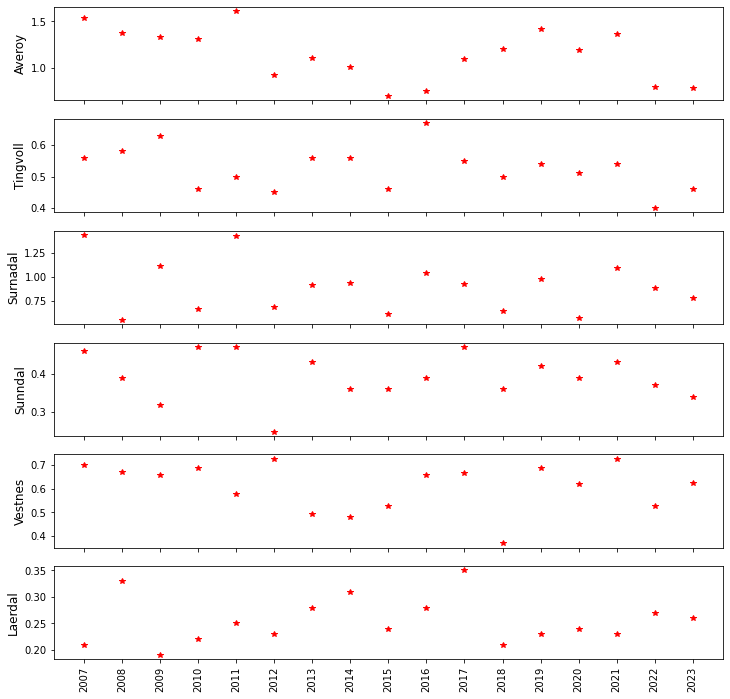

In [41]:
from scipy import stats
municipalities = ["Averoy", "Tingvoll", "Surnadal", "Sunndal", "Vestnes", "Laerdal"]
data_municipality = [
    data_Averoy,
    data_Tingvoll,
    data_Surnadal,
    data_Sunndal,
    data_Vestnes,
    data_Laerdal,
]

fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(12, 12))
years = np.arange(2007,2024,1)
time_axis = np.arange(number_of_years)

for q in range(len(municipalities)):
    [
        municipality,
        first_year,
        last_year,
        number_of_years,
        years,
        seen_deer_obs,
        seen_deer_obs_forest,
        seen_deer_obs_farmland,
        hinds_per_stag_obs,
        total_harvest,
        total_quota,
        fraction_female_calves_harvested,
        fraction_young_hinds_harvested,
        fraction_adult_hinds_harvested,
        fraction_male_calves_harvested,
        fraction_young_stags_harvested,
        fraction_adult_stags_harvested,
        spring_counts,
    ] = data_municipality[q]
    
    if q == 2:
            seen_deer_obs = seen_deer_obs_farmland
    else:
        seen_deer_obs = seen_deer_obs
        
    seen_deer_obs = np.array(seen_deer_obs)
    upper_bound = 1.5*max(seen_deer_obs)
    lower_bound = 0.5*min(seen_deer_obs)
    result = stats.kstest(seen_deer_obs, stats.uniform(loc=lower_bound, scale=upper_bound).cdf)
    print(municipalities[q],":")
    
    ax[q].plot(time_axis,seen_deer_obs, 'r*')
    
    ax[q].set_xticks(time_axis)
    ax[q].set_xticklabels([])
    if q == 5:
        ax[q].set_xticklabels(years, rotation="vertical")
    ax[q].set_ylabel(municipality, fontsize=12)
    
    print("Results of Kolmogorov-Smirnov Test:")
    print(result)
    print()
pass;